# Лабораторная №3 по Wolfram
### Ильиных В.М. М8О-201Б-19

## Модель "хищник-жертва"

Manipulate[Show[myGraffic[a, c, d]], {a, 3, 6, 0.5}, {c, 1, 4, 0.5}, {d, 1, 4, 0.5}]
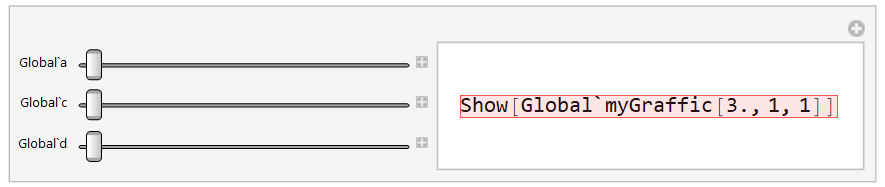

In [33]:
x = .
y = .
myGraffic[aa_, cc_, dd_] := Module[{a = aa, c = cc, d = dd, plt = {}},
    For[b = 4, b > 1, b--,
        eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
        eq2[t_] := y'[t] == y[t] * (-c + d * x[t]);
        sol = NDSolve[{eq1[t], eq2[t], x[0] == 2, y[0] == 1}, {x, y}, {t, 0, 7}, MaxSteps -> 3000];
        plt = Append[plt, ParametricPlot[Evaluate[{x[t], y[t]} /. sol], {t, 0, 7}, PlotRange -> {{0, 3}, {0, 3}}]]
    ];
    Return[plt]
];
(* Manipulate работает почему-то только на wolframcloud *)
a=.
c=.
d=.
Manipulate[Show[myGraffic[a, c, d]], {a, 3, 6, 0.5}, {c, 1, 4, 0.5}, {d, 1, 4, 0.5}]


## Падение тела, брошенного под углом к горизонту

-Graphics-
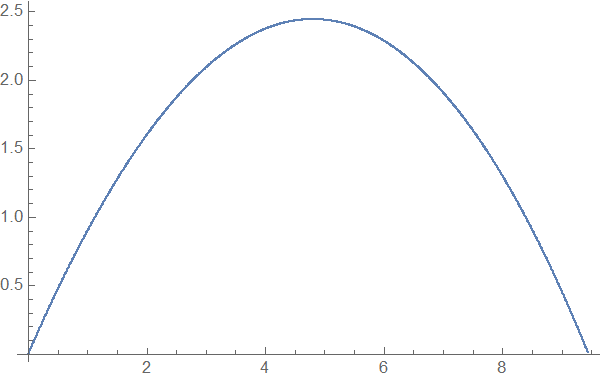

In [41]:
k = 0.01;
g = 9.81;
tmax = 1.41;
alpha = Pi/4;
v0 = 10;

solutions = NDSolve[{
        y1'[t] == y2[t],
        y2'[t] == -k*y2[t]*Sqrt[y2[t]^2 + y4[t]^2],
        y3'[t] == y4[t],
        y4'[t] == -k*y4[t]*Sqrt[y2[t]^2 + y4[t]^2] - g,
        y1[0] == 0,
        y2[0] == v0*Cos[alpha],
        y3[0] == 0,
        y4[0] == v0*Sin[alpha]
    },
    {y1, y2, y3, y4},
    {t, 0, tmax}
];
plots = Table[{y1[t], y3[t]}/.solutions[[1]], {t, 0, tmax, 0.001}];
ListPlot[plots]